# Wstęp

# Dlaczego AI ma szansę działać? 

##$A$ się uczy
$A$ na podstawie doświadczenia $E$, w jakiejś mierze doskonałości $P$, polepsza swój wynik

## Cel algorytmu ML
Na podstawie danych odtworzyć (dobrze przybliżyć) funkcję $f: \mathbb R^n \to \mathbb R$

## Twierdzenie Cybenki
 
Istnieją macierze $A \in \mathbb R^{n \times m}$ i $B \in \mathbb R^m$ oraz funkcje $\phi_1, \phi_2, \dots, \phi_m: \mathbb R \to \mathbb R$ takie, że $\hat f$ jest dobrym przybliżeniem.

$$\hat f(\bar x): \bar x =\pmatrix{x_1 \\ x_2 \\ \dots \\ x_n}
\mapsto A\bar x = \pmatrix{(A\bar x)_1\\(A\bar x)_2 \\ \cdots \\ (A\bar x)_m}
\mapsto \pmatrix{\phi_1((A\bar x)_1)\\\phi_2((A\bar x)_2) \\ \cdots \\ \phi_m((A\bar x)_m)} \mapsto \sum_{i=1}^m b_i \cdot \phi_i((A\bar x)_i)$$


### Ulepszenie (twierdzenie ciągle działa)
$\phi_1 = \phi_2 = \dots = \phi_m$ i jest z jakiejś odpowiednio dobrej klasy (**funkcje aktywacji**), np.
- $\arctan(x)$
- $\operatorname{hardarctan}(x) = 
\begin{cases}
x & \text{dla } x \in (-\frac{\pi}{2}, \frac{\pi}{2}) \\
\frac{\pi}{2} & \text{dla } x \geq \frac{\pi}{2} \\
-\frac{\pi}{2} & \text{dla } x \leq -\frac{\pi}{2}
\end{cases}
$
- $\max(0,x)$  
- $\operatorname{softmax}(x) = \ln(e^x+1)$ 
- $\dots$






### Wykresy

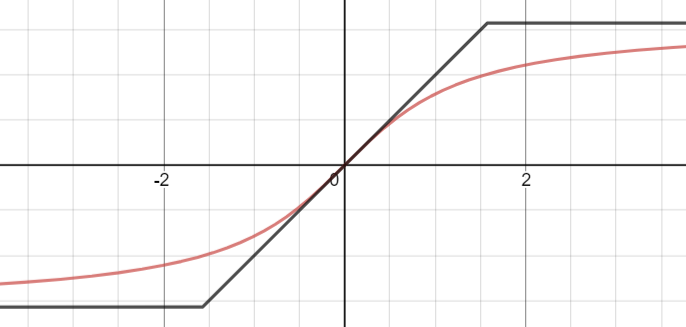

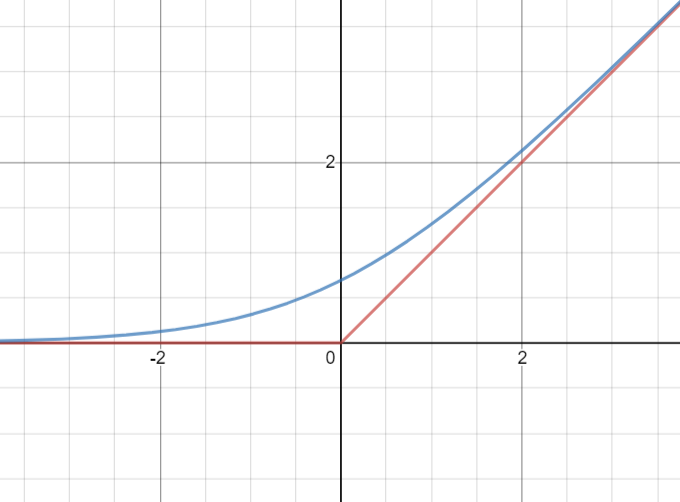

## Co z tym robimy?
Takiej funkcji $\hat f$ w idealnej sytuacji szukamy dla całej dziedziny wejść i odpowiadających im wyjść. 

W rzeczywistości oczywiście dostaniemy skończenie wiele wejść/wyjść.

Próbujemy dostosować parametry $\hat f$ tak, aby zaszedł proces uczenia się, tj. nasz algorytm polepszał się w jakiejś się w jakiejś mierze doskonałości.

## Funkcja błędu $L$
 
To właśnie będzie nasza miara dokładności.

$L$ ma na celu powiedzieć nam, jak dla naszego przybliżenia $\hat f$ pomylił się nasz algorytm. Chce więc w jakiś sposób porównać nasze wyjścia od oczekiwanych wyjść. 

Przykłady:
- błąd kwadratowy: $\sum_{\bar x \in X} (\hat f(\bar x) - f (\bar x))^2$
- inne

## Gradient $\nabla$

Gradient to taka wielowymiarowa pochodna (wektor pochodnych cząstkowych po kolejnych zmiennych).Wskazuje nam on monotoniczność funkcji wokół jakiegoś punktu. Rozważmy funkcję błędu $L(a_{1,1}, \dots, b_1, \dots)$, argumentami są wszystkie zmienne w układzie (elementy macierzy $A$ i $B$). 

$$\nabla L = \begin{pmatrix}\frac{\partial L}{\partial a_{1,1}} \\ \dots \\\frac{\partial L}{\partial b_1}\\\dots\end{pmatrix}$$

Co ważne, gradient jesteśmy w stanie jawnie wyliczyć.

"Schodząc" w kierunku przeciwnym do gradientu, zbliżamy się do minimum funkcji $L$, a więc minimalizujemy błąd.

Krok robimy taki:
$\begin{pmatrix}a_{1,1}\\ \dots\\ b_1\\ \dots\end{pmatrix} \mathrel{-}= \alpha \cdot \nabla L $, gdzie $\alpha\in\mathbb R$ to stała zwana **learning rate**.
 
Proces ten nazywamy **gradient descent**.

### Przykład 1D

![](https://miro.medium.com/max/375/0*qtiSV8B2__XR52XP.jpg)

https://medium.com/hackernoon/gradient-descent-aynk-7cbe95a778da


### Przykład 2D


![](https://cdn.kastatic.org/ka-perseus-images/7980cfd5fbfe1ac2ab08c16bbd0951447619b135.png)

https://pl.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient



# Perceptron

![](https://pythonmachinelearning.pro/wp-content/uploads/2017/09/Single-Perceptron.png.webp)

### Spróbujmy za pomocą perceptronów uzyskać $\hat f$ z tw. Cybenki



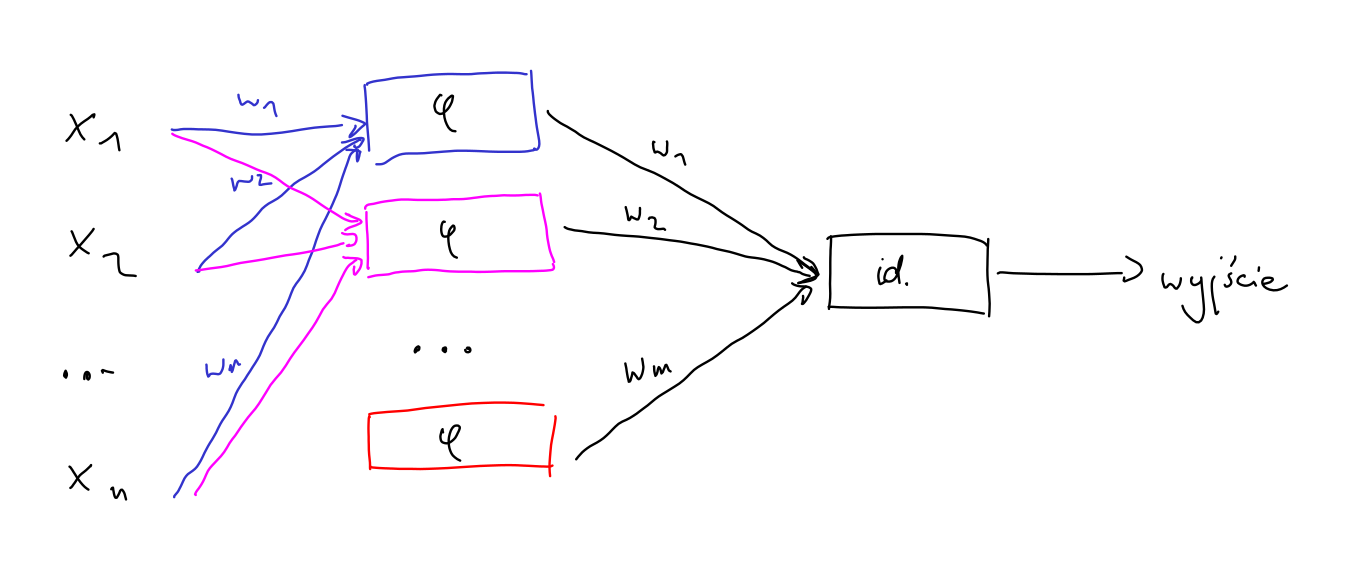

## Uwagi
- W większości przypadków zadziała więcej warstw perceptronów, a nawet pozwoli to użycie ich mniejszej liczby.
- W pewnych szczególnych przypadkach można użyć tylko jednego perceptronu.

# Praktyka


In [2]:
# Numpy służy nam tylko do obliczeń
import numpy as np

In [3]:
class Perceptron():
  def __init__(self, size, init_weights: bool, activation, bias):
    self.size = size
    self.bias = bias
    self.activation = activation
    if init_weights:
      self.weights = np.random.rand(size)
    else:
      self.weights = np.zeros(size)

  def calc(self, input):
    assert len(input)==self.size
    sum = np.dot(input, self.weights) + self.bias # suma x_i w_i + bias
    return self.activation(sum)

  def learn(self, input, true_value, loss, lr):
    prediction = self.calc(input)
    self.bias += lr * loss(true_value, prediction)
    self.weights += np.array([input[i] * lr * loss(true_value, prediction) for i in range(self.size)])

  def learn_gradient(self, input, true_value, loss, lr):
    prediction = self.calc(input)
    self.weights -= np.array([lr * loss.df(true_value, prediction) * self.activation.df(prediction) * input[i] for i in range(self.size)])
    self.bias -= lr * loss.df(true_value, prediction) * self.activation.df(prediction)

In [4]:
class Activation():
  def __call__(self, x):
    return self.f(x)

class Sigmoid(Activation):
  def f(self, x):
    return 1/(1+np.exp(-x))
  def df(self, x):
    return np.exp(-x)/(np.exp(-x)+1)**2

class Step(Activation):
  def __init__(self, threshold=0.6): self.threshold = threshold
  def f(self, x):
    return 1 if x > self.threshold else 0

class Step2(Activation):
  def __init__(self, threshold=0.6): self.threshold = threshold
  def f(self, x):
    return 1 if x > self.threshold else -1

In [5]:
class Loss():
  def __call__(self, *args):
    return self.f(*args)

class Basic(Loss): # tego nie używać
  def f(self, y1, y2):
    return y1 - y2

class Quadratic(Loss):
  def f(self, y1, y2):
    return 0.5*(y1-y2)**2
  def df(self, y1, y2):
    return y2 - y1

class Absolute(Loss):
  def f(self, y1, y2):
    return abs(y1, y2)

In [6]:
p1 = Perceptron(1, False, Step(), 0.5)
p1.weights, p1.bias

(array([0.]), 0.5)

In [7]:
V = [-0.23]
p1.calc(V)

0

In [11]:
p1.learn([-0.23], 1, Quadratic(), 0.99)
for v in V_all:
  p1.learn(v, 1, Quadratic(), 0.99)

In [10]:
p1.calc(V)

1

In [12]:
p5 = Perceptron(5, 1, Sigmoid(), 0)
p5.weights, p1.bias

(array([0.37149686, 0.07984002, 0.46495787, 0.38119102, 0.71920412]), 0.995)

In [13]:
p5.calc([0.3, 0.75, 2.1, 3.14, 0.139])

0.9201693172347651

In [33]:
p5.learn([0.3, 0.75, 2.1, 3.14, 0.139], 0, Basic(), 0.5)
p5.calc([0.3, 0.75, 2.1, 3.14, 0.139])

0.0034760085971601686

## Neuron sigmoidalny z gradient descent

Funkcja błędu (loss function):
$L(\hat{y})=0.5\cdot(y-\hat{y})^2$

Funkcja aktywacji: 
$\sigma(x)=\frac{1}{1+e^{-x}}$

Output: $ \hat y = \sigma\left((\sum w_i x_i) + b_i\right)$

Gradient: 

$$ \nabla L(\hat y) = \begin{pmatrix}\frac{\partial}{\partial w_1}L(\hat y) \\ \dots \\ \frac{\partial}{\partial b}L(\hat y)
\end{pmatrix} 
= \begin{pmatrix}
L'(\hat y) \cdot \frac{\partial}{\partial w_1}\sigma(\hat y) \\ \dots \\ L'(\hat y) \cdot \frac{\partial}{\partial b}\sigma(\hat y)
\end{pmatrix}
 = \begin{pmatrix}
L'(\hat y) \cdot \sigma'(\hat y) \cdot x_i \\ \dots \\ L'(\hat y) \cdot \sigma'(\hat y)
\end{pmatrix} $$ 

Implementacja [powyżej](#scrollTo=BbLYuhRhcmB_)


In [57]:
sig = Perceptron(1, 1, Sigmoid(), 0)

In [58]:
sig.weights, sig.bias

(array([0.39768818]), 0)

In [61]:
loss = Quadratic() 
loss(1, sig.calc([0.56]))

0.09881352375231302

In [56]:
sig.learn_gradient([0.56], 1, Quadratic(), 1)
sig.calc([0.56])

1.0

### Zadanie:
Skorzystaj z powyższych funkcji żeby skonstruować model i nauczyć go na poniższych danych:
```
[5.1,3.5,1.4,0.2], 0
[4.9,3.0,1.4,0.2], 0 
[4.7,3.2,1.3,0.2], 0 
[4.6,3.1,1.5,0.2], 0 
[5.0,3.6,1.4,0.2], 0 
[5.4,3.9,1.7,0.4], 0 
[4.6,3.4,1.4,0.3], 0 
[7.0,3.2,4.7,1.4], 1 
[6.4,3.2,4.5,1.5], 1 
[6.9,3.1,4.9,1.5], 1 
[5.5,2.3,4.0,1.3], 1 
[6.5,2.8,4.6,1.5], 1  
[5.7,2.8,4.5,1.3], 1 
[6.3,3.3,4.7,1.6], 1 
```


In [ ]:
p = Perceptron(5, False, Sigmoid(), 0)
for i in range(10):
  ...


I sprawdź na danych:
```
[5.8,2.6,4.0,1.2] 
[5.1,3.8,1.6,0.2] 
[6.2,2.9,4.3,1.3]
[5.7,2.9,4.2,1.3]
[4.6,3.2,1.4,0.2]
[5.3,3.7,1.5,0.2]
[5.5,2.6,4.4,1.2]
[5.0,3.3,1.4,0.2]
```
Odpowiedzi wyślij na **warsztaty@deepsat.pl**.

Na zwycięzcę czeka nagroda.